In [21]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib import colors
from matplotlib.colors import hsv_to_rgb

In [2]:
def imshow(img):
  cv2.imshow(" .. ",img)
  cv2.waitKey(0)
  cv2.destroyAllWindows()


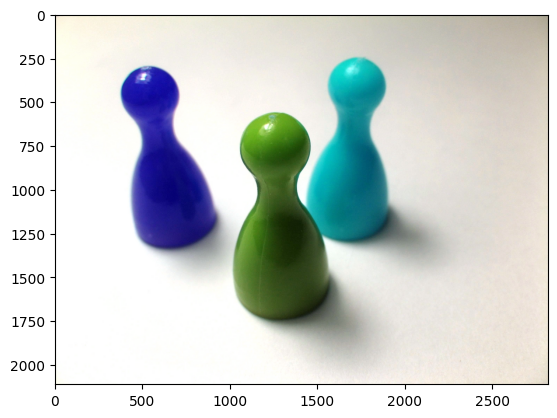

In [11]:
img = cv2.imread('./red-green-yellow-figures.jpg')
plt.imshow(img)
plt.show()

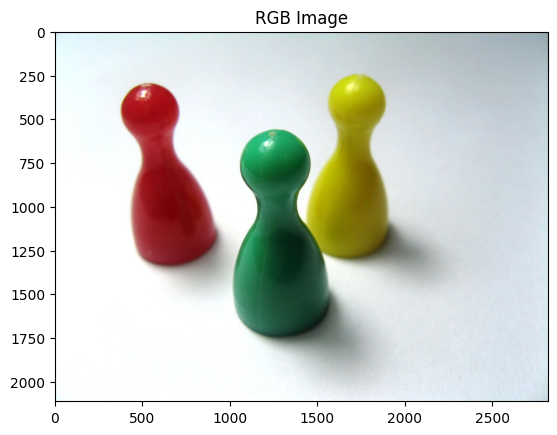

In [12]:
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.title("RGB Image")
plt.show()

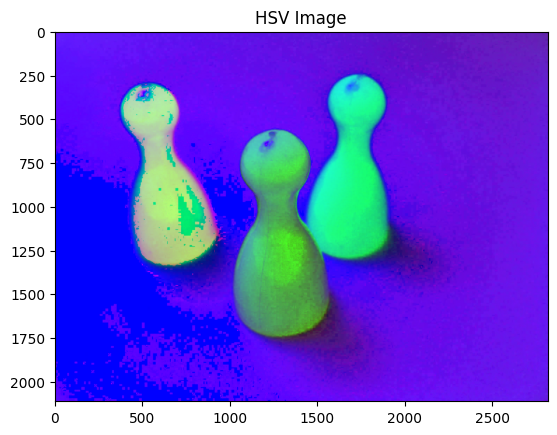

In [13]:
hsv_img = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2HSV)
plt.imshow(hsv_img)
plt.title("HSV Image")
plt.show()

**Visualizing color distribution of the image's pixels in RGB and HSV.**


In [14]:
pixel_colors = img_rgb.reshape((np.shape(img_rgb)[0]*np.shape(img_rgb)[1], 3))
norm = colors.Normalize(vmin=-1.,vmax=1.)
norm.autoscale(pixel_colors)
pixel_colors = norm(pixel_colors).tolist()

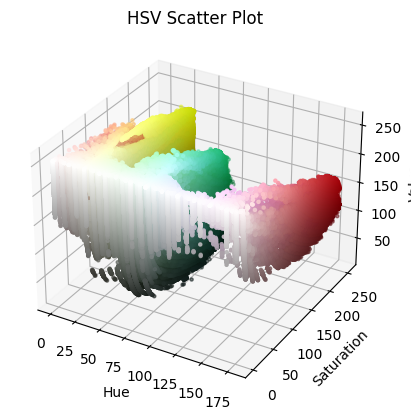

In [15]:

h, s, v = cv2.split(hsv_img)
fig = plt.figure()
axis = fig.add_subplot(1, 1, 1, projection="3d")

axis.scatter(h.flatten(), s.flatten(), v.flatten(), facecolors=pixel_colors, marker=".")
axis.set_xlabel("Hue")
axis.set_ylabel("Saturation")
axis.set_zlabel("Value")
plt.title("HSV Color Distribution Scatter Plot")
plt.show()

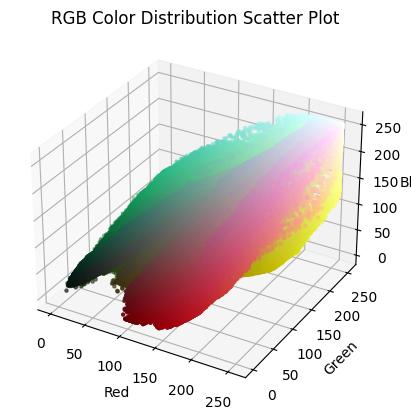

In [18]:
r, g, b = cv2.split(img_rgb)
fig = plt.figure()
axis = fig.add_subplot(1, 1, 1, projection="3d")

pixel_colors = img_rgb.reshape((np.shape(img_rgb)[0]*np.shape(img_rgb)[1], 3))
norm = colors.Normalize(vmin=-1.,vmax=1.)
norm.autoscale(pixel_colors)
pixel_colors = norm(pixel_colors).tolist()

axis.scatter(r.flatten(), g.flatten(), b.flatten(), facecolors=pixel_colors, marker=".")
axis.set_xlabel("Red")
axis.set_ylabel("Green")
axis.set_zlabel("Blue")
plt.title("RGB Color Distribution Scatter Plot")
plt.show()

**Picking Out a Range**

In [33]:

# lower boundary RED color range values; Hue (0 - 10)
lower_red1 = np.array([0, 100, 20])
upper_red1 = np.array([10, 255, 255])

# upper boundary RED color range values; Hue (160 - 180)
lower_red2 = np.array([160,100,20])
upper_red2 = np.array([179,255,255])

# Define the range of green color in HSV (expanded ranges)
lower_green1 = np.array([35, 50, 50])
upper_green1 = np.array([70, 255, 255])
lower_green2 = np.array([71, 50, 50])
upper_green2 = np.array([90, 255, 255])



In [34]:
low_red_square = np.full((10, 10, 3), lower_red1, dtype=np.uint8) / 255.0
dark_red_square = np.full((10, 10, 3), upper_red1, dtype=np.uint8) / 255.0
low_red_square2 = np.full((10, 10, 3), lower_red2, dtype=np.uint8) / 255.0
dark_red_square2 = np.full((10, 10, 3), upper_red2, dtype=np.uint8) / 255.0

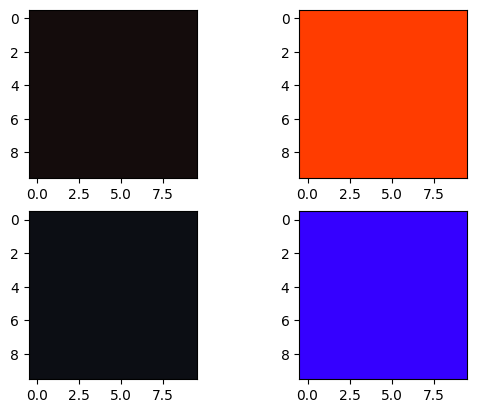

In [35]:
#plot ranges by converting them to RGB for viewing
plt.subplot(2, 2, 1)
plt.imshow(hsv_to_rgb(low_red_square))
plt.subplot(2, 2, 2)
plt.imshow(hsv_to_rgb(dark_red_square))
plt.subplot(2, 2, 3)
plt.imshow(hsv_to_rgb(low_red_square2))
plt.subplot(2, 2, 4)
plt.imshow(hsv_to_rgb(dark_red_square2))
plt.show()

**Mask Image Using The Threshold Values**

In [36]:
# Threshold the HSV image to get only red and green colors
lower_mask_red1 = cv2.inRange(hsv_img, lower_red1, upper_red1)
upper_mask_red2 = cv2.inRange(hsv_img, lower_red2, upper_red2)
full_mask_red = lower_mask_red1 + upper_mask_red2


In [37]:
result = cv2.bitwise_and(img_rgb, img_rgb , mask=full_mask_red)

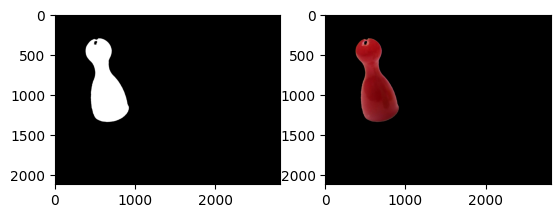

In [38]:
plt.subplot(1, 2, 1)
plt.imshow(full_mask_red, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(result)
plt.show()

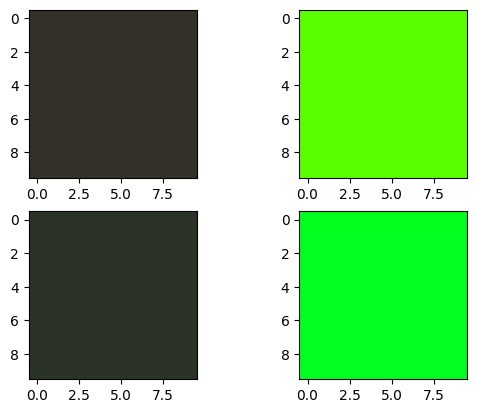

In [39]:
low_green_square = np.full((10, 10, 3), lower_green1, dtype=np.uint8) / 255.0
dark_green_square = np.full((10, 10, 3), upper_green1, dtype=np.uint8) / 255.0
low_green_square2 = np.full((10, 10, 3), lower_green2, dtype=np.uint8) / 255.0
dark_green_square2 = np.full((10, 10, 3), upper_green2, dtype=np.uint8) / 255.0
#plot ranges by converting them to RGB for viewing
plt.subplot(2, 2, 1)
plt.imshow(hsv_to_rgb(low_green_square))
plt.subplot(2, 2, 2)
plt.imshow(hsv_to_rgb(dark_green_square))
plt.subplot(2, 2, 3)
plt.imshow(hsv_to_rgb(low_green_square2))
plt.subplot(2, 2, 4)
plt.imshow(hsv_to_rgb(dark_green_square2))
plt.show()


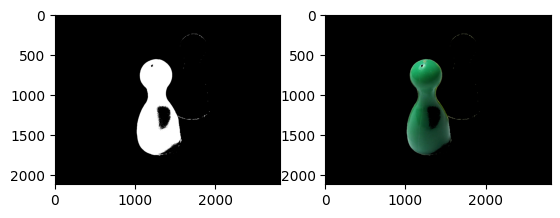

In [40]:
# Threshold the HSV image to get only red and green colors
lower_mask_green1 = cv2.inRange(hsv_img, lower_green1, upper_green1)
upper_mask_green2 = cv2.inRange(hsv_img, lower_green2, upper_green2)
full_mask_green = lower_mask_green1 + upper_mask_green2

result_green = cv2.bitwise_and(img_rgb, img_rgb , mask=full_mask_green)

plt.subplot(1, 2, 1)
plt.imshow(full_mask_green, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(result_green)
plt.show()


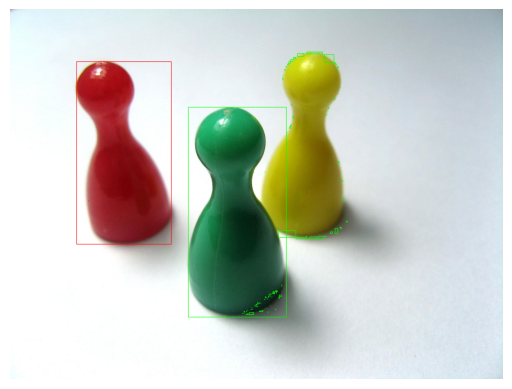

In [44]:

"""
-Finds contours in the binary mask full_mask_red representing the red objects.
-cv2.RETR_EXTERNAL retrieves only the external contours (contours along the outer edge of the object)
-cv2.CHAIN_APPROX_SIMPLE compresses horizontal, vertical, and diagonal segments, leaving only their end points.
"""
contours_red, _ = cv2.findContours(full_mask_red, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Find contours for green objects
contours_green, _ = cv2.findContours(full_mask_green, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw bounding boxes around red objects
if contours_red:
    for contour in contours_red:
        x, y, w, h = cv2.boundingRect(contour)
        cv2.rectangle(img_rgb, (x, y), (x + w, y + h), (255, 0, 0), 2)

# Draw bounding boxes around green objects
if contours_green:
    for contour in contours_green:
        x, y, w, h = cv2.boundingRect(contour)
        cv2.rectangle(img_rgb, (x, y), (x + w, y + h), (0, 255, 0), 2)


# Display the image with bounding boxes
plt.imshow(img_rgb)
plt.axis('off')  # Turn off axis
plt.show()